# 2 Learning from data
## 2.1. : Data generation.


In [2]:
import numpy as np
import matplotlib . pyplot as plt
from sklearn . model_selection import train_test_split
from sklearn . linear_model import LinearRegression
# Generate 100 samples
n_samples = 100
# Generate X values ( uniformly distributed between 0 and 10)
X = 10 * np.random.rand(n_samples, 1)
# Generate epsilon values ( normally distributed with mean 0 and standard deviation 15)
epsilon = np . random . normal (0 , 15 , n_samples )
# Generate Y values using the model Y = 3 + 3X +
epsilon
Y = 3 + 2 * X + epsilon [: , np . newaxis ]

## 2.2. : Data visualization.


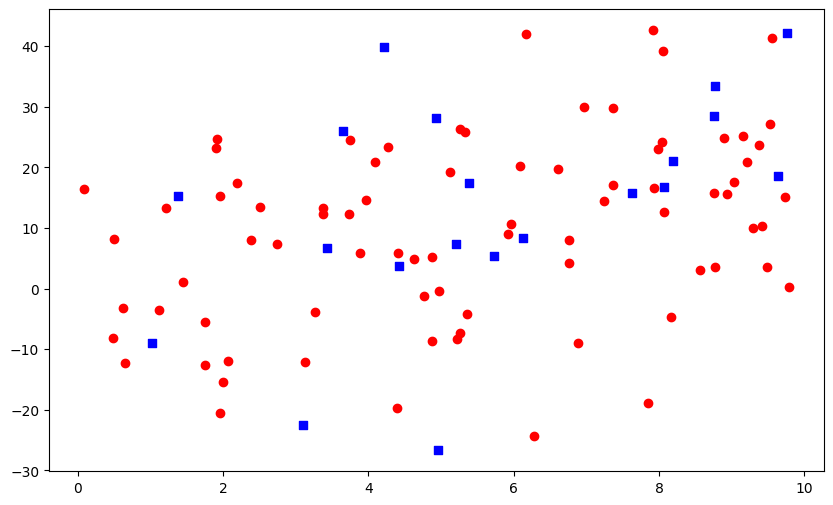

In [3]:
r=np.random.randint(104)
# Split the data into training and test sets (80% train,20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2,random_state=r)
# Plot the data points


plt.figure(figsize=(10, 6))
plt.scatter(X_train, Y_train, alpha=1, marker='o',color='red',label='Training␣Data')
plt.scatter(X_test, Y_test, alpha=1, marker='s',color='blue',label='Testing␣Data')
plt.show()


The reason the training and testing datasets differ in each run is due to the use of the `np.random.randint(104)` function, which generates a random integer each time it's called. This integer acts as a random seed for the `train_test_split` function, determining how the data is shuffled and then divided into training and testing sets.

When you set a specific value for the random state in the train-test data splitting, it guarantees that the same data points will be included in the training and testing sets every time the code is run, ensuring consistency. However, in this case, we are using `r=np.random.randint(104)` to generate a different random state for each run. Because `r` changes randomly every time the code is executed, it results in different data points being selected for training and testing, which is why we observe different scatter plots each time we run the code.

### Extra part to compare difference


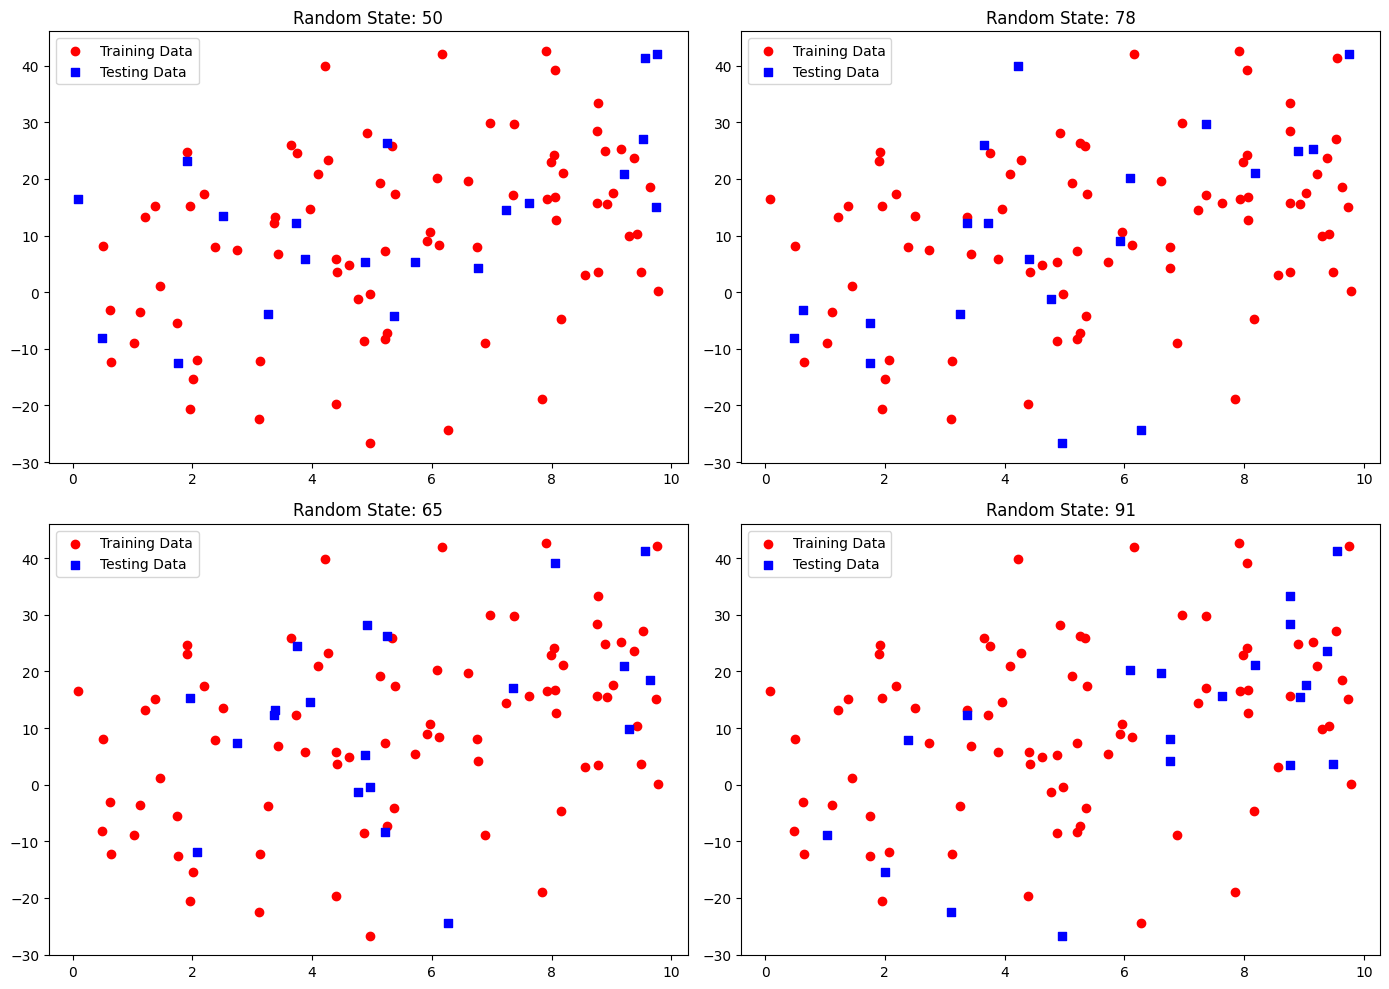

In [4]:
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.model_selection import train_test_split

# Generate four different random states
random_states = [np.random.randint(104) for _ in range(4)]

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Loop over the random states and axes to create the plots
for i, ax in enumerate(axes.flat):
    # Split the data using the current random state
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=random_states[i])

    # Plot the data points
    ax.scatter(X_train, Y_train, alpha=1, marker='o', color='red', label='Training Data')
    ax.scatter(X_test, Y_test, alpha=1, marker='s', color='blue', label='Testing Data')

    # Add title and legend to each subplot
    ax.set_title(f'Random State: {random_states[i]}')
    ax.legend()

# Display the grid of images
plt.tight_layout()
plt.show()


When state change testing and training data set will change.But overall same data set was choosen for both.



## 2.3. Linear regression

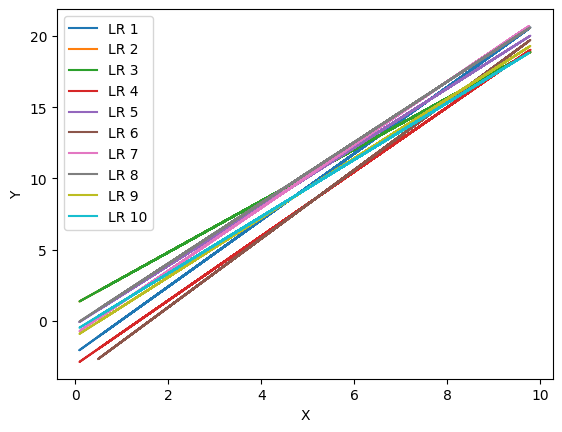

In [5]:
for i in range(10):# Plotting 10 different instances
  X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=np.random.randint(104))
  model = LinearRegression()
  model.fit(X_train, Y_train)
  Y_pred_train = model.predict(X_train)
  plt.plot(X_train, Y_pred_train, label=f'LR {i+1}')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

The linear regression model differs from one instance to another because the training dataset changes each time due to the random splitting of data using a randomly generated random state. Each time the `train_test_split` function is called with a new random state, different training data is selected. Since the model is trained on different data sets in each iteration, the model parameters (such as slope and intercept) change, resulting in different linear regression models for each iteration.

## 2.4.Repeat 3 with n_sample = 10,000

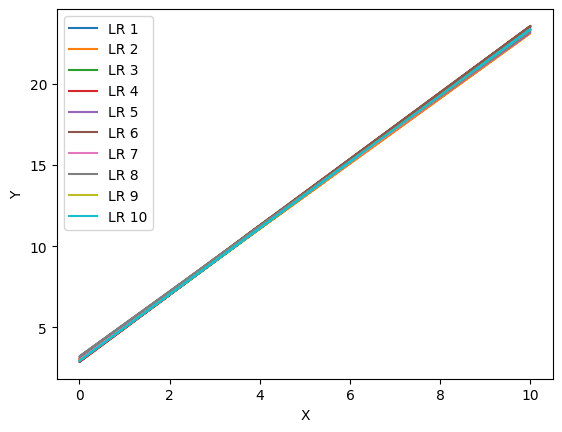

In [6]:
# Generate 10,000 samples
n_samples = 10000
# Generate X values ( uniformly distributed between 0 and 10)
X = 10 * np.random.rand(n_samples, 1)
# Generate epsilon values ( normally distributed with mean 0 and standard deviation 15)
epsilon = np . random . normal (0 , 15 , n_samples )
# Generate Y values using the model Y = 3 + 3X +
epsilon
Y = 3 + 2 * X + epsilon [: , np . newaxis ]
for i in range(10):# Plotting 10 different instances
  X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=np.random.randint(104))
  model = LinearRegression()
  model.fit(X_train, Y_train)
  Y_pred_train = model.predict(X_train)
  plt.plot(X_train, Y_pred_train, label=f'LR {i+1}')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

When the number of data samples is increased to 10,000, the variation in the linear regression models across different iterations will generally decrease. This happens because larger datasets provide more information, leading to more stable and consistent model training. With 10,000 samples, the training data is more representative of the overall data distribution, reducing the impact of random variations caused by different random states in the data splitting process. Consequently, the model parameters (such as slope and intercept) become more stable, resulting in similar linear regression lines across different iterations. In contrast, with only 100 samples, the random splits lead to greater variability in the training data, causing more fluctuations in the model parameters and the resulting regression lines.(When we increase the sample size population mean will equal to sample mean)

# 3 Linear regression on real world data

## 3.1. Loading data

Installing missing packge

In [7]:
  !pip install ucimlrepo

In [8]:
# If package not installed, install it using pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
# fetch dataset
infrared_thermography_temperature = fetch_ucirepo(id=925)
# data (as pandas dataframes)
X = infrared_thermography_temperature.data.features
y = infrared_thermography_temperature.data.targets
# metadata
print(infrared_thermography_temperature.metadata)
# variable information
print(infrared_thermography_temperature.variables)


{'uci_id': 925, 'name': 'Infrared Thermography Temperature', 'repository_url': 'https://archive.ics.uci.edu/dataset/925/infrared+thermography+temperature+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/925/data.csv', 'abstract': 'The Infrared Thermography Temperature Dataset contains temperatures read from various locations of inferred images about patients, with the addition of oral temperatures measured for each individual. The 33 features consist of gender, age, ethnicity, ambiant temperature, humidity, distance, and other temperature readings from the thermal images. The dataset is intended to be used in a regression task to predict the oral temperature using the environment information as well as the thermal image readings. ', 'area': 'Health and Medicine', 'tasks': ['Regression'], 'characteristics': ['Tabular'], 'num_instances': 1020, 'num_features': 33, 'feature_types': ['Real', 'Categorical'], 'demographics': ['Gender', 'Age', 'Ethnicity'], 'target_col': ['aveO

## 3.2.

In [9]:
print(X.shape[1])#to cheak number of independent varibles
print(y.shape[1])#to cheak number of dependent variables

33
2


numer of independet varibles - 33      

numer of dependet varibles - 2

## 3.3.  

In [10]:
print(infrared_thermography_temperature.metadata)
print(infrared_thermography_temperature.variables)

{'uci_id': 925, 'name': 'Infrared Thermography Temperature', 'repository_url': 'https://archive.ics.uci.edu/dataset/925/infrared+thermography+temperature+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/925/data.csv', 'abstract': 'The Infrared Thermography Temperature Dataset contains temperatures read from various locations of inferred images about patients, with the addition of oral temperatures measured for each individual. The 33 features consist of gender, age, ethnicity, ambiant temperature, humidity, distance, and other temperature readings from the thermal images. The dataset is intended to be used in a regression task to predict the oral temperature using the environment information as well as the thermal image readings. ', 'area': 'Health and Medicine', 'tasks': ['Regression'], 'characteristics': ['Tabular'], 'num_instances': 1020, 'num_features': 33, 'feature_types': ['Real', 'Categorical'], 'demographics': ['Gender', 'Age', 'Ethnicity'], 'target_col': ['aveO

It is not possible to apply linear regression directly on this dataset because it contains categorical data, such as 'Gender', 'Age', and 'Ethnicity'. Linear regression requires numerical input, so categorical data must be converted into a numerical form to proceed.

**Steps:**

1. **One-Hot Encoding**: Convert the categorical features ('Gender', 'Age', 'Ethnicity') into numerical values using one-hot encoding. This will create binary columns for each category, making them suitable for linear regression.

2. **Feature Scaling**: After encoding, features are scaled appropriately.

3. **Handling Missing Values**: Check for any missing values in the dataset remove them or replce them with average values.

4. **Check for Multicollinearity**:Cheak highly correlated features. If present, combine or remove correlated features to avoid redundancy and improve model performance.


## 3.4.

The provided code snippet attempts to handle missing values by dropping them separately from X and y:
     # Drop rows with missing values from both X and y
            X = X.dropna()
            y = y.dropna()


The provided method is wong because it removes missing values from X and y independently. This separate handling can cause the features and target labels to become misaligned. In a dataset, each row in the feature set X should correspond directly to a row in the target variable y. If rows are removed from X without removing the corresponding rows from y, or vice versa, the pairing of data points with their respective labels is disrupted.

To correctly handle the missing values, we first need to inspect the dataset to understand how many missing values are present. If only a few values are missing, it might be acceptable to drop the corresponding rows.

In [11]:
import pandas as pd
data_set = pd.concat([X, y], axis=1)

In [12]:
print(data_set.isnull().sum())

Gender         0
Age            0
Ethnicity      0
T_atm          0
Humidity       0
Distance       2
T_offset1      0
Max1R13_1      0
Max1L13_1      0
aveAllR13_1    0
aveAllL13_1    0
T_RC1          0
T_RC_Dry1      0
T_RC_Wet1      0
T_RC_Max1      0
T_LC1          0
T_LC_Dry1      0
T_LC_Wet1      0
T_LC_Max1      0
RCC1           0
LCC1           0
canthiMax1     0
canthi4Max1    0
T_FHCC1        0
T_FHRC1        0
T_FHLC1        0
T_FHBC1        0
T_FHTC1        0
T_FH_Max1      0
T_FHC_Max1     0
T_Max1         0
T_OR1          0
T_OR_Max1      0
aveOralF       0
aveOralM       0
dtype: int64


Output showing that only 'Distance' column has two missing values. As there are only two missing values in 'Distance', it's okay to remove these rows (with respect to total data set).

In [13]:
data_set = data_set.dropna(subset=['Distance'])

#data_set =data_set.dropna()

In [14]:
print(data_set.isnull().sum())

Gender         0
Age            0
Ethnicity      0
T_atm          0
Humidity       0
Distance       0
T_offset1      0
Max1R13_1      0
Max1L13_1      0
aveAllR13_1    0
aveAllL13_1    0
T_RC1          0
T_RC_Dry1      0
T_RC_Wet1      0
T_RC_Max1      0
T_LC1          0
T_LC_Dry1      0
T_LC_Wet1      0
T_LC_Max1      0
RCC1           0
LCC1           0
canthiMax1     0
canthi4Max1    0
T_FHCC1        0
T_FHRC1        0
T_FHLC1        0
T_FHBC1        0
T_FHTC1        0
T_FH_Max1      0
T_FHC_Max1     0
T_Max1         0
T_OR1          0
T_OR_Max1      0
aveOralF       0
aveOralM       0
dtype: int64


In [15]:
#import pandas as pd
#data_set = pd.concat([X, y], axis=1)
print(data_set)
print("-----------------------------------------------------------------------")
data_set.head()

      Gender    Age                  Ethnicity  T_atm  Humidity  Distance  \
0       Male  41-50                      White   24.0      28.0       0.8   
1     Female  31-40  Black or African-American   24.0      26.0       0.8   
2     Female  21-30                      White   24.0      26.0       0.8   
3     Female  21-30  Black or African-American   24.0      27.0       0.8   
4       Male  18-20                      White   24.0      27.0       0.8   
...      ...    ...                        ...    ...       ...       ...   
1015  Female  21-25                      Asian   25.7      50.8       0.6   
1016  Female  21-25                      White   25.7      50.8       0.6   
1017  Female  18-20  Black or African-American   28.0      24.3       0.6   
1018    Male  26-30            Hispanic/Latino   25.0      39.8       0.6   
1019  Female  18-20                      White   23.8      45.6       0.6   

      T_offset1  Max1R13_1  Max1L13_1  aveAllR13_1  ...  T_FHLC1  T_FHBC1  

,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,...,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralF,aveOralM
0,Male,41-50,White,24.0,28.0,0.8,0.7025,35.0300,35.3775,34.4000,...,33.3725,33.4925,33.0025,34.5300,34.0075,35.6925,35.6350,35.6525,36.85,36.59
1,Female,31-40,Black or African-American,24.0,26.0,0.8,0.7800,34.5500,34.5200,33.9300,...,33.6775,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075,37.00,37.19
2,Female,21-30,White,24.0,26.0,0.8,0.8625,35.6525,35.5175,34.2775,...,34.6475,34.8200,34.6700,35.3450,35.2225,35.9125,35.8600,35.8850,37.20,37.34
3,Female,21-30,Black or African-American,24.0,27.0,0.8,0.9300,35.2225,35.6125,34.3850,...,34.6550,34.3025,34.9175,35.6025,35.3150,35.7200,34.9650,34.9825,36.85,37.09
4,Male,18-20,White,24.0,27.0,0.8,0.8950,35.5450,35.6650,34.9100,...,34.3975,34.6700,33.8275,35.4175,35.3725,35.8950,35.5875,35.6175,36.80,37.04


## 3.5.

 select "aveOralM" as the dependent feature and 'T_atm', 'Humidity', 'Distance', 'T_FH_Max1' , 'age' as independent varibles



In [16]:
# One-hot encode the 'Age' categorical variable
age_encoded = pd.get_dummies(data_set['Age'], prefix='Age')

# Add the one-hot encoded columns back to the dataset and drop the original 'Age' column
data_set = pd.concat([data_set, age_encoded], axis=1)
data_set = data_set.drop('Age', axis=1)

# Select the dependent and independent variables
dependent_feature = data_set['aveOralM']
independent_features = data_set[['T_atm', 'Humidity', 'Distance', 'T_FH_Max1'] + list(age_encoded.columns)]

# Combine into a new DataFrame for modeling
model_data = pd.concat([independent_features, dependent_feature], axis=1)

# Display the prepared dataset
print("Prepared dataset:")
independent_features.head()


Prepared dataset:


,T_atm,Humidity,Distance,T_FH_Max1,Age_18-20,Age_21-25,Age_21-30,Age_26-30,Age_31-40,Age_41-50,Age_51-60,Age_>60
0,24.0,28.0,0.8,34.5300,False,False,False,False,False,True,False,False
1,24.0,26.0,0.8,34.6825,False,False,False,False,True,False,False,False
2,24.0,26.0,0.8,35.3450,False,False,True,False,False,False,False,False
3,24.0,27.0,0.8,35.6025,False,False,True,False,False,False,False,False
4,24.0,27.0,0.8,35.4175,True,False,False,False,False,False,False,False


In [17]:
dependent_feature.head()

,aveOralM
0,36.59
1,37.19
2,37.34
3,37.09
4,37.04


## 3.6.

Split the data into training and testing sets with 80% of data points for training and
20% of data points for testing.


In [18]:
X_train,X_test, y_train, y_test = train_test_split(independent_features, dependent_feature, test_size=0.2, random_state=42)

## 3.7.

Train a linear regression model and estimate the coefficient corresponds to independent variables.

In [19]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
# Make predictions using the testing set
y_pred = model.predict(X_test)

# Creating the DataFrame with features and their coefficients
coeff_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_})

# Install the tabulate module
!pip install tabulate

# Import the tabulate function
from tabulate import tabulate

# Displaying the DataFrame as a table
print("Intercept:", model.intercept_)
print("Estimated features vs coefficients:")
print(tabulate(coeff_df, headers='keys', tablefmt='pretty'))

Intercept: 13.238798996804732
Estimated features vs coefficients:
+----+-----------+-----------------------+
|    |  Feature  |      Coefficient      |
+----+-----------+-----------------------+
| 0  |   T_atm   | -0.055535893239226766 |
| 1  | Humidity  | 0.003422392005267033  |
| 2  | Distance  | 0.0026393537872089093 |
| 3  | T_FH_Max1 |  0.7092038079633628   |
| 4  | Age_18-20 | -0.09521023788460654  |
| 5  | Age_21-25 | -0.10911840778186253  |
| 6  | Age_21-30 | -0.03372839990148858  |
| 7  | Age_26-30 | -0.08394109824533079  |
| 8  | Age_31-40 | -0.13698172540270473  |
| 9  | Age_41-50 |  0.21089662330066358  |
| 10 | Age_51-60 | -0.08176010339345889  |
| 11 |  Age_>60  |  0.32984334930878834  |
+----+-----------+-----------------------+


<ipython-input-22-53a471df34c0>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, color='red')


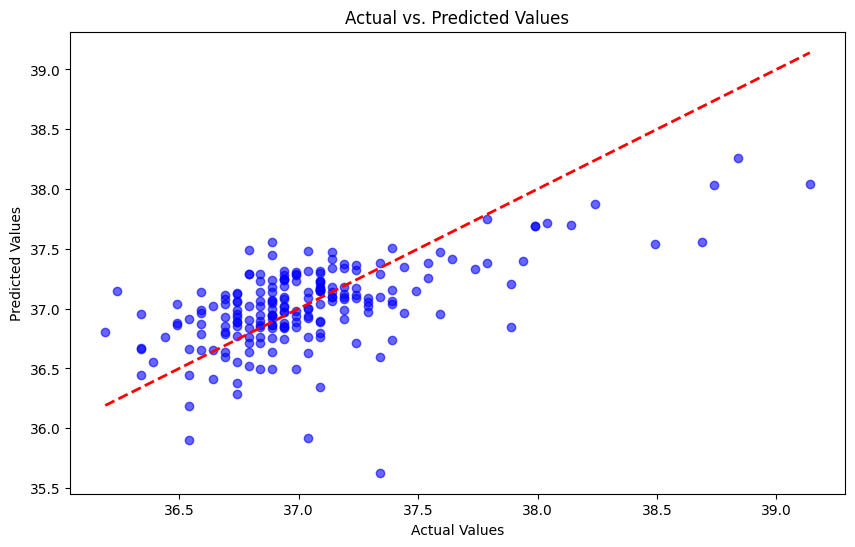

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

## 3.8.

By looking at the coefficient we can see T_FH_Max1 got the maximum value which mean T_FH_Max1 contributes highly for the dependent feature



<ipython-input-23-843087b86571>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coeff_df, palette='viridis')


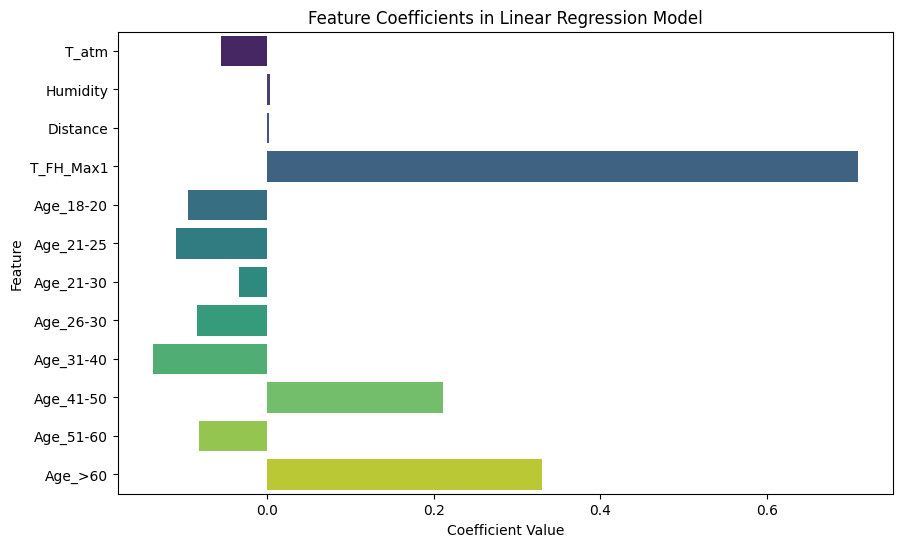

In [23]:

# Plotting the coefficients
!pip install seaborn # install seaborn
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coeff_df, palette='viridis')
plt.title('Feature Coefficients in Linear Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()


## 3.9.

In [24]:
# Select the dependent and independent variables
dependent_feature_n = data_set['aveOralM']
independent_features_n = data_set[['T_OR1', 'T_OR_Max1', 'T_FHC_Max1', 'T_FH_Max1'] ]
# Combine into a new DataFrame for modeling
model_data_n = pd.concat([independent_features_n, dependent_feature_n], axis=1)

# Display the prepared dataset
print("Prepared dataset:")
#independent_features_n.head()

X_train,X_test, y_train, y_test = train_test_split(independent_features_n, dependent_feature_n, test_size=0.2, random_state=42)

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Creating the DataFrame with features and their coefficients
coeff_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_})

# Displaying the DataFrame as a table
print("Intercept:", model.intercept_)
print("Estimated features vs coefficients:")
print(tabulate(coeff_df, headers='keys', tablefmt='pretty'))


Prepared dataset:
Intercept: 6.79355629984887
Estimated features vs coefficients:
+---+------------+----------------------+
|   |  Feature   |     Coefficient      |
+---+------------+----------------------+
| 0 |   T_OR1    | 0.20545776323994563  |
| 1 | T_OR_Max1  | 0.34819684316002775  |
| 2 | T_FHC_Max1 | -0.08371846705362093 |
| 3 | T_FH_Max1  |  0.376564342065323   |
+---+------------+----------------------+


<ipython-input-25-53a471df34c0>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, color='red')


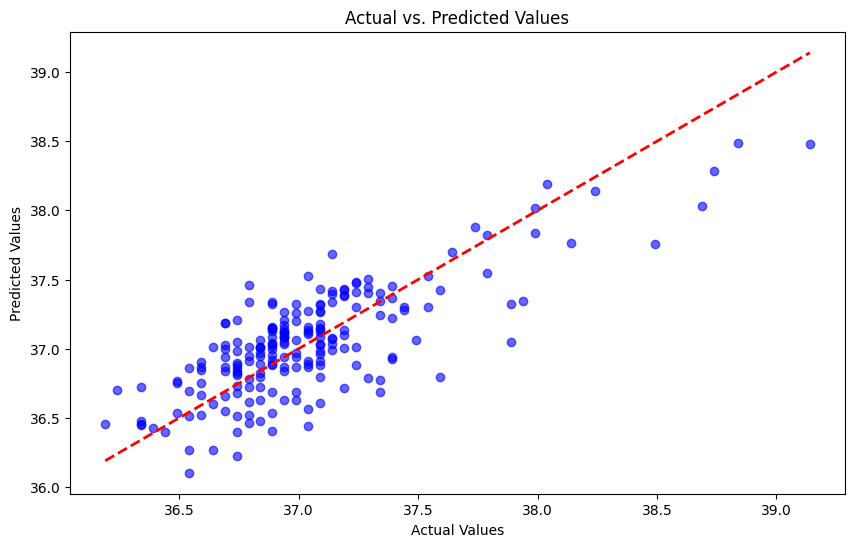

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

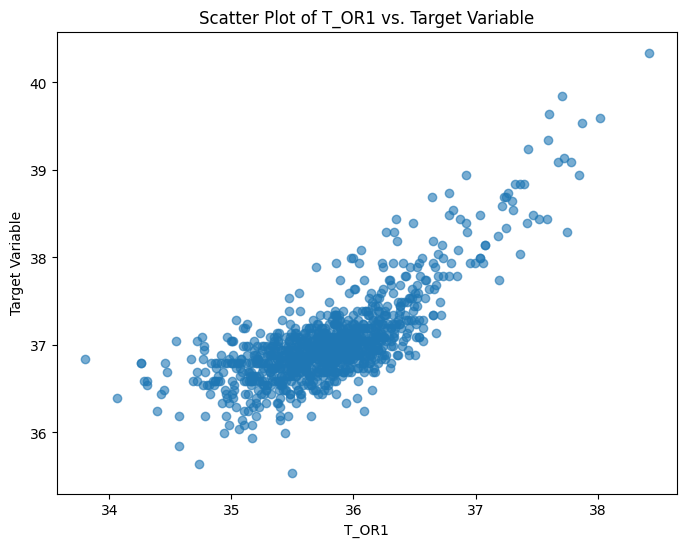

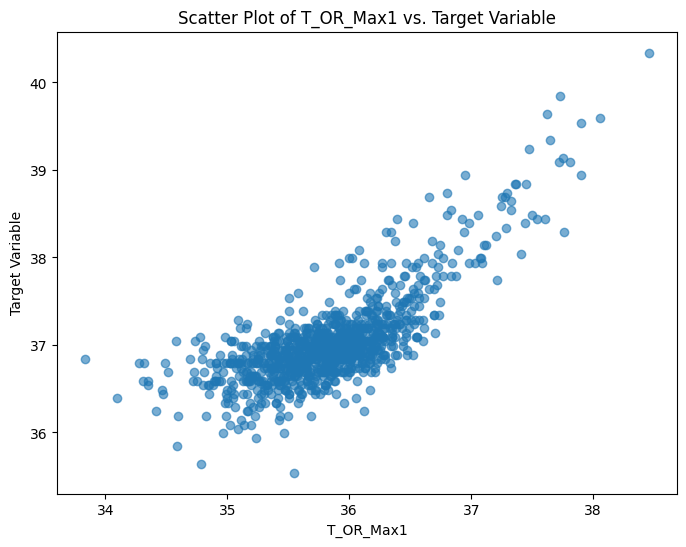

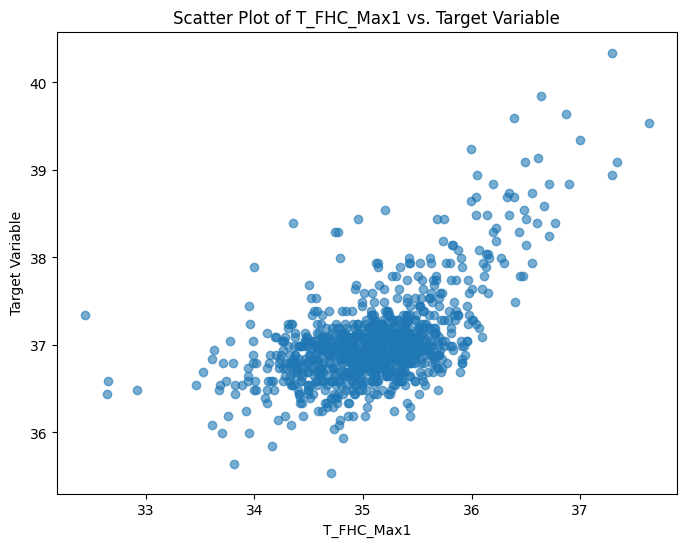

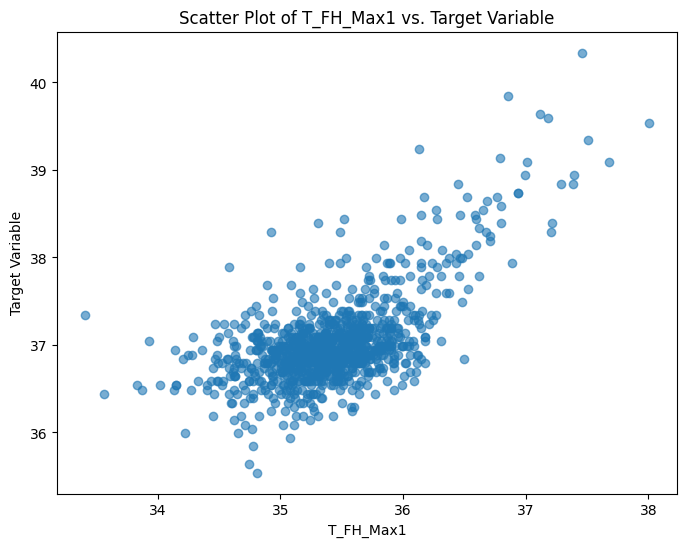

In [26]:
import matplotlib.pyplot as plt

# Assuming 'independent_features_n' is your DataFrame with independent features
# and 'dependent_feature_n' is your Series with the target variable
for col in independent_features_n.columns:
  plt.figure(figsize=(8, 6))
  plt.scatter(independent_features_n[col], dependent_feature_n, alpha=0.6)
  plt.xlabel(col)  # Label with the independent variable name
  plt.ylabel('Target Variable')
  plt.title(f'Scatter Plot of {col} vs. Target Variable')
  plt.show()

In [27]:
yhat=model.predict(X_train)
d = independent_features_n.shape[1]
print('d:',d)

# Residual Sum of Sqaures (RSS)
RSS = np.sum((yhat - y_train)**2)
print('RSS=', RSS)

N=len(y_train)
#print('Number of Datapoints=',N)

# Residual Standard Error (RSE)
RSE = np.sqrt(1/(N-d-1)*RSS)
print('RSE=', RSE)

# Mean squre error(MSE)
#predictions = lm.predict(X_train)

newX = pd.DataFrame({"Constant":np.ones(len(X_train))}).join(pd.DataFrame(X_train))
MSE = (sum((y_train-yhat)**2))/(len(newX)-len(newX.columns))
print('MSE=', MSE)

# Total Sum of Squares (TSS)
TSS = np.sum((y_train- np.mean(y_train))**2)
print('TSS=', TSS)

# R2

R2 = (TSS - RSS)/TSS
print('R² (from direct calculations)=', R2)

# Calculation of R2 using sklearn
R2 = model.score(X_train,y_train)

print('R² (from sklearn module)=', R2)

d: 4
RSS= 77.97449082857881
RSE= 0.31045739777400483
MSE= 0.09638379583260669
TSS= 223.63911855036855
R² (from direct calculations)= 0.6513378726673116
R² (from sklearn module)= 0.6513378726673116


In [35]:
from scipy.stats import t
import numpy as np
import scipy.stats as stats
#samples size
SN = len(X_train)

features = ['T_OR1', 'T_OR_Max1', 'T_FHC_Max1', 'T_FH_Max1']
w_0 = model.intercept_
w_1 = model.coef_

NF = len(features)

#Calculate Standard error
standard_error = []
for feature in features:
  SE2 = RSS/(SN-NF-1) / np.sum((X_train[feature] - np.mean(X_train[feature]))**2)
  standard_error.append(np.sqrt(SE2))

#calculate t values
t_values = []
for i in range(NF):
  t_values.append(w_1[i]/standard_error[i])

#calculate p-values
p_values = []
for i in range(NF):
  p_values.append(2 * (1 - stats.t.cdf(abs(t_values[i]), SN-NF-1)))


# Create a DataFrame to display the values in a table
results_df = pd.DataFrame({
    'Feature': features,
    'Standard Error': standard_error,
    't-value': t_values,
    'p-value': p_values
})

# Print the table
print(results_df)

# Save the table to a CSV file (optional)
results_df.to_csv('model_statistics.csv', index=False)

      Feature  Standard Error    t-value  p-value
0       T_OR1        0.019226  10.686208  0.00000
1   T_OR_Max1        0.019219  18.117535  0.00000
2  T_FHC_Max1        0.018810  -4.450810  0.00001
3   T_FH_Max1        0.020771  18.129689  0.00000
